Import librariers & dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df=pd.read_csv("company_stocks.csv" )

Create new variables in order to find total,mean & varfiance in stock prices for different companies

In [105]:
df["Total_Stock_Price"]=df.loc[:,"04-01-2010":"29-10-2013"].sum(axis=1)

In [106]:
df["Mean_Stock_Price"]=df.loc[:,"04-01-2010":"29-10-2013"].mean(axis=1)

In [107]:
df["Variance_Stock_Price"]=df.loc[:,"04-01-2010":"29-10-2013"].var(axis=1)

Extract only total & variance in order to build clusters

In [109]:
stk_price=df[["Total_Stock_Price",'Variance_Stock_Price']]

Scale the data in order to remove bias

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
standard_scaler = StandardScaler()

In [113]:
stk_norm = standard_scaler.fit_transform(stk_price)

Create a dataframe as the model fit output will be in the form of an array

In [115]:
stk_norm = pd.DataFrame(stk_norm)

In [116]:
stk_norm.columns = ['Total Stock Price for 3 yrs','Variance in stock price for 3 yrs']

In [117]:
stk_norm.head()

,Total Stock Price for 3 yrs,Variance in stock price for 3 yrs
0,-1.439005,1.032840
1,1.186232,0.499208
2,0.948687,1.877474
3,-1.575584,-0.797397
4,-0.181384,-0.539608


Applying hopkins statistics inorder to find out if clusters can be formed on the dataset.

In [118]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [119]:
hopkins(stk_norm)

0.84032640127057712

0.84 is strong value that indicates clusters can be formed.
Anything nearing to 1 indicates clusters are possible on the dataset
Apply hierarchy cluster method 

In [120]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [121]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

In [122]:
link = linkage(stk_norm, method='ward', metric='euclidean')

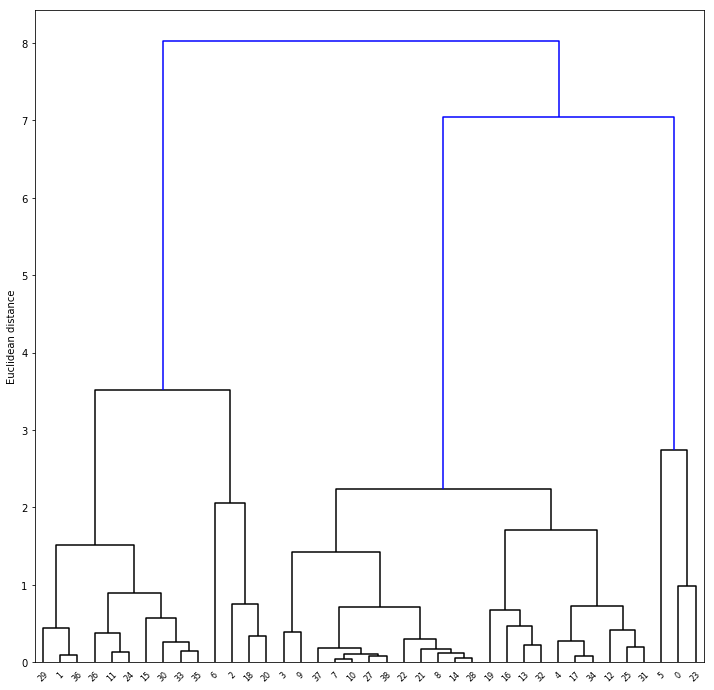

In [123]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

Dendrogram can be cut at 5. This will lead to 3 clusters.
Build agglomerative cluster framing 3 clusters

In [124]:
from sklearn.cluster import AgglomerativeClustering

In [160]:
model = AgglomerativeClustering(n_clusters=3)

In [161]:
model.fit(stk_norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000001BC5C2077B8>)

In [162]:
from sklearn.metrics import silhouette_score

In [163]:
silhouette_score(stk_norm, model.labels_)

0.54987643332422964

silhouette score indicate fair intra homogenity

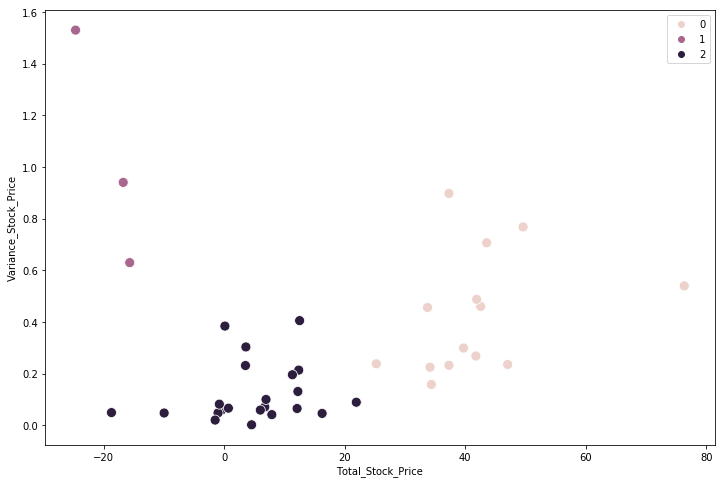

In [164]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total_Stock_Price', y='Variance_Stock_Price', data=stk_price, hue=model.labels_, s=100)
plt.show()

Cluster 2 stocks are performing good as thier total stock price is high with lesser variance. Highly reliable to invest.
Cluster 0 stocks tend to have high variance in stock prices. These stocks seem to be slightly risky.
Cluster 1 stocks are having abrupt variance.un reliable stocks to invest.
